In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

%matplotlib inline

In [3]:
df_train = pd.read_csv('data/train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df_man=df_train.copy()

In [7]:
df_man["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [8]:
df_man["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [9]:
def transform(X):
    X['Sex'] = X['Sex'].map({'female': 1, 'male': 0}).astype(int)
    freq_port = X["Embarked"].dropna().mode()[0]
    X['Embarked'] = X['Embarked'].fillna(freq_port)
    X["Age"].fillna(X["Age"].mean(), inplace=True)
    X['Embarked'] = X['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)

    return X

### Using a ColumnTransformer

In [ ]:
from sklearn.compose import ColumnTransformer

trans = ColumnTransformer([
    ('do_nothing', 'passthrough', ['Parch', 'SibSp'])
])

In [10]:
df_man.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
X=df_man[["Pclass", "Sex","Age", "SibSp", "Parch", "Fare","Embarked"]]
y=df_man["Survived"]

In [12]:
# Import the necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=42)

In [13]:
X_train_transformed=transform(X_train)
X_test_transformed=transform(X_test)

C:\Users\Master\AppData\Local\Temp/ipykernel_15780/2904468914.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Sex'] = X['Sex'].map({'female': 1, 'male': 0}).astype(int)
C:\Users\Master\AppData\Local\Temp/ipykernel_15780/2904468914.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Embarked'] = X['Embarked'].fillna(freq_port)
C:\Users\Master\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the c

In [14]:
X_train_transformed.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
445,1,0,4.000000,0,2,81.8583,0
650,3,0,29.256353,0,0,7.8958,0
172,3,1,1.000000,1,1,11.1333,0
450,2,0,36.000000,1,2,27.7500,0
314,2,0,43.000000,1,1,26.2500,0


In [15]:
X_train_transformed["Age"].isna().sum()

0

## 3. Fit the Model

In [16]:
# Create the classifier: logreg
logreg = LogisticRegression()

# Fit the classifier to the training data
logreg.fit(X_train_transformed, y_train)

C:\Users\Master\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## 4. Test for Overfitting and Underfitting

In [17]:
# train accuracy
logreg.score(X_train_transformed,y_train)  

0.8009630818619583

In [18]:
# Predict the labels of the test set: y_pred
y_pred = logreg.predict(X_test_transformed)
logreg.score(X_test_transformed, y_test)

0.8059701492537313

## 5. Precision vs recall

In [19]:
from sklearn.metrics import precision_score, recall_score
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)

print(precision_score(y_test,y_pred), recall_score(y_test,y_pred))

0.7920792079207921 0.7207207207207207


## 6. Confusion matrix

In [20]:
conf = confusion_matrix(y_test,y_pred)
conf

array([[136,  21],
       [ 31,  80]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix')

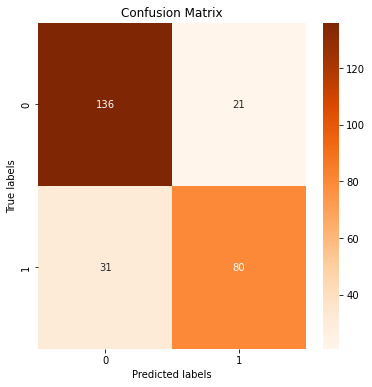

In [24]:
#plot the heatmap
fig = plt.figure(figsize=(6, 6))
ax = plt.subplot()
sns.heatmap(conf, annot=True, ax = ax,fmt='g', cmap = 'Oranges')
plt.gcf().set_facecolor('white')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')


## 7. Receiver Operator Curve and Area Under the Curve.

In [22]:
from sklearn.metrics import plot_roc_curve, auc, roc_curve
probs = logreg.predict_proba(X_test) 
fpr, tpr, threshold = roc_curve(y_test, probs[:,1])

Area under the curve =  0.8785792161588339


(0.0, 1.0)

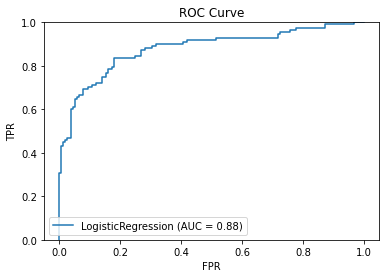

In [25]:
# Calculating area under the curve
auc_score = auc(fpr, tpr)
print("Area under the curve = ",auc_score)

plot_roc_curve(logreg, X_test_transformed, y_test)  
plt.title("ROC Curve")
plt.gcf().set_facecolor('white')
plt.ylabel("TPR")
plt.xlabel("FPR")
plt.legend(loc="lower left")
plt.ylim([0,1.00])

## 8. Precision Recall Curve

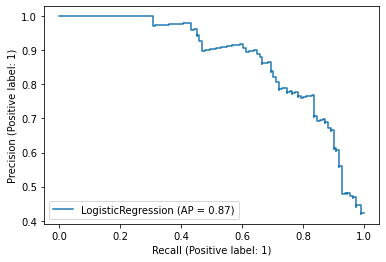

In [29]:
from sklearn.metrics import plot_precision_recall_curve
# plot precision and recall curve 
plot_precision_recall_curve(logreg, X_test_transformed, y_test)
plt.gcf().set_facecolor('white')

In [32]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_test, probs[:,1])

In [33]:
# compute area under precision recall curve 
pr_area = auc(recalls, precisions)
pr_area

0.8714067755167691

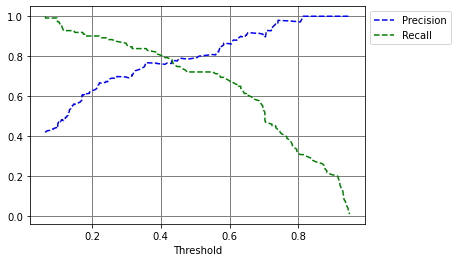

In [35]:
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
plt.xlabel("Threshold")
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.grid(b=True, which="both", axis="both", color='gray', linestyle='-', linewidth=1)
plt.gcf().set_facecolor('white')
plt.show()